<a href="https://colab.research.google.com/github/wnrud1225/stock-price-prediction/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EC%B4%88_%EB%A7%88%EC%A7%80%EB%A7%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**---------version1---------**

In [1]:
#파일 다운로드
from urllib.request import urlretrieve
urlretrieve("https://drive.google.com/uc?export=download&id=1qF-SBe8zemcGku9oYywwvP_bB5PBWI27", "netflix.csv")

('netflix.csv', <http.client.HTTPMessage at 0x7fe12aa44d00>)

In [2]:
#FinanceDataReader 모듈 다운
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import FinanceDataReader as fdr

In [ ]:
df = pd.read_csv('netflix.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-24,196.649994,196.899994,195.330002,195.750000,195.750000,2160500
1,2017-11-27,195.559998,195.850006,194.000000,195.050003,195.050003,3210100
2,2017-11-28,195.339996,199.679993,194.009995,199.179993,199.179993,6981100
3,2017-11-29,198.910004,199.029999,184.320007,188.149994,188.149994,14202700
4,2017-11-30,190.309998,190.860001,186.679993,187.580002,187.580002,6630100
5,2017-12-01,186.990005,189.800003,185.000000,186.820007,186.820007,6219500
6,2017-12-04,189.360001,189.720001,178.380005,184.039993,184.039993,9069800
7,2017-12-05,183.500000,188.139999,181.190002,184.210007,184.210007,5783700
8,2017-12-06,183.380005,186.479996,182.880005,185.300003,185.300003,5490100
9,2017-12-07,185.710007,187.339996,183.220001,185.199997,185.199997,4659500


In [ ]:
df['Open'] = df['Open'].astype('int')
df['High'] = df['High'].astype('int')
df['Low'] = df['Low'].astype('int')
df['Adj Close'] = df['Adj Close'].astype('int')
df['Volume'] = df['Volume'].astype('int')
df['Close'] = df['Close'].astype('int')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-24,196,196,195,195,195,2160500
1,2017-11-27,195,195,194,195,195,3210100
2,2017-11-28,195,199,194,199,199,6981100
3,2017-11-29,198,199,184,188,188,14202700
4,2017-11-30,190,190,186,187,187,6630100


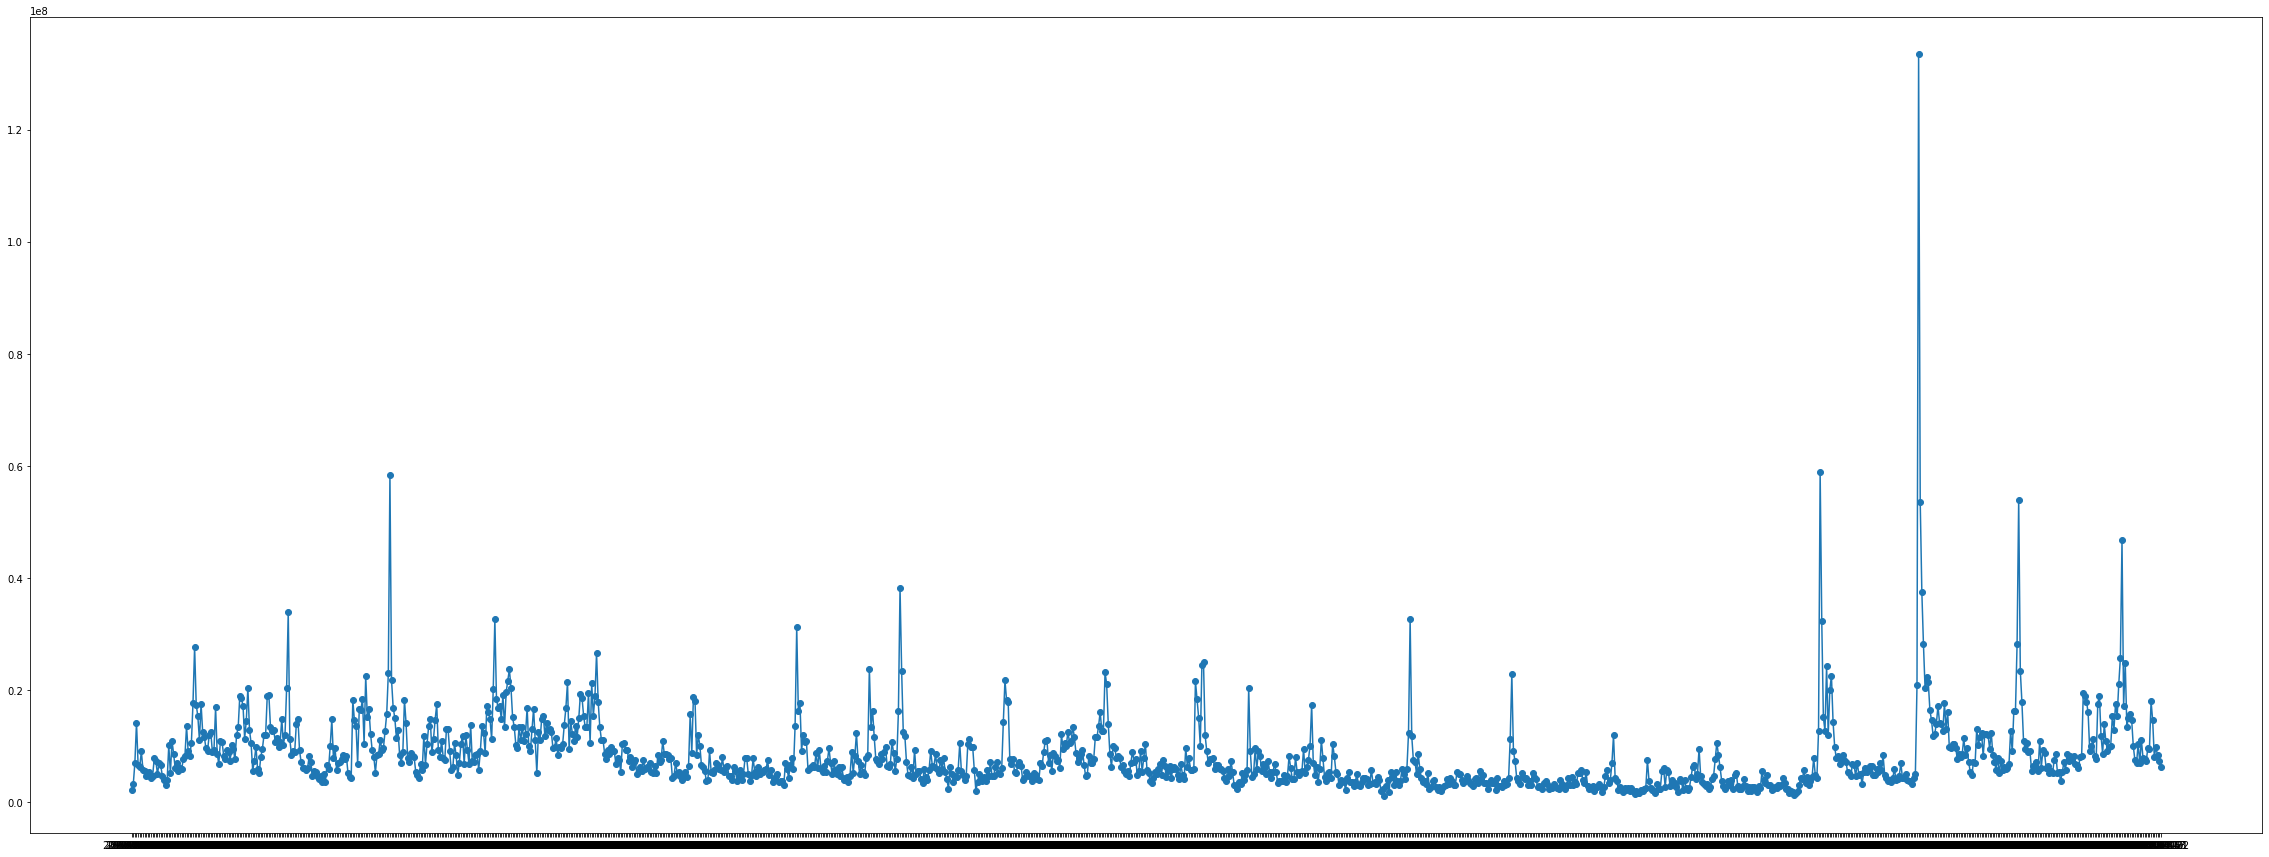

In [ ]:
df2 = pd.DataFrame({
      'x_axis': df['Date'],
      'y_axis': df['Volume']
})
plt.figure(figsize=(40,15))
plt.plot('x_axis', 'y_axis', data=df2, linestyle='-', marker='o')
plt.show()
plt.show()

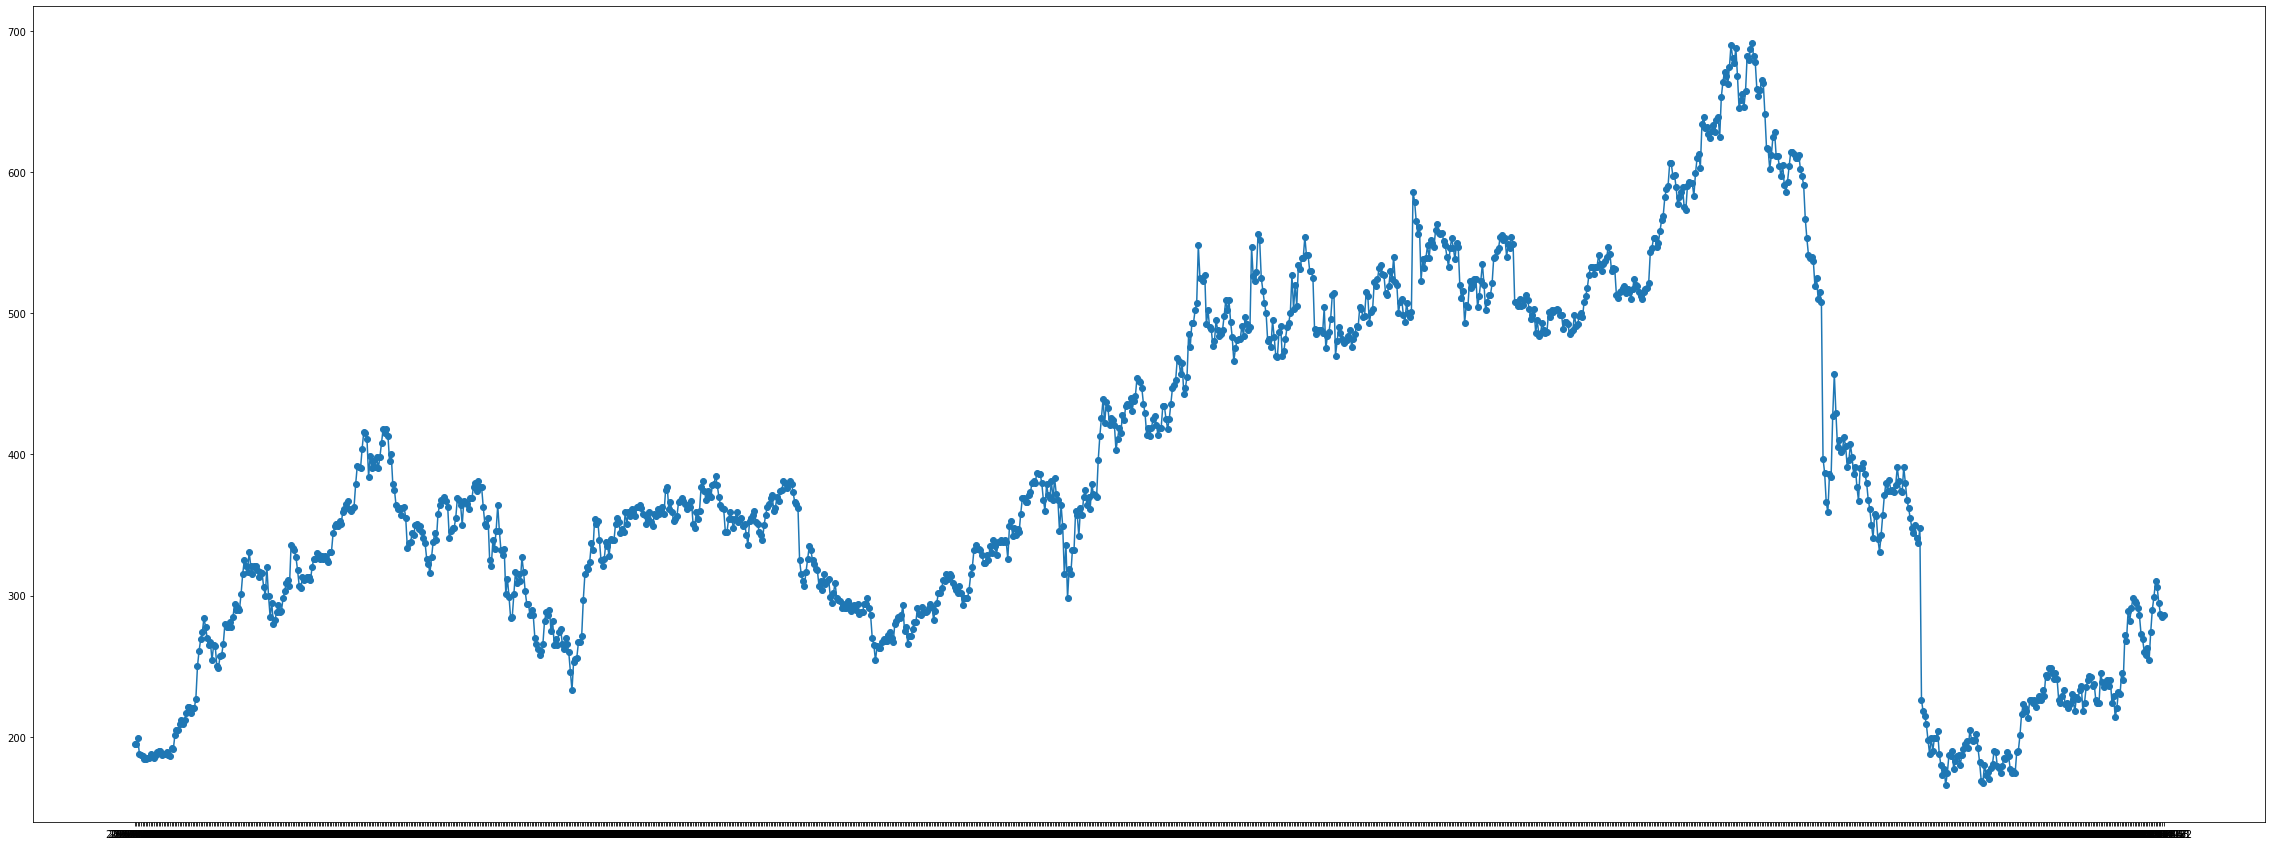

In [ ]:
df1 = pd.DataFrame({
      'x_axis': df['Date'],
      'y_axis': df['Close']
})
plt.figure(figsize=(40,15))
plt.plot('x_axis', 'y_axis', data=df1, linestyle='-', marker='o')
plt.show()
plt.show()

In [ ]:
close_prices = df['Close'].values
print(close_prices)

windown_size = 30

result_list = []
for i in range(len(close_prices) - (windown_size + 1)):
    result_list.append(close_prices[i: i+(windown_size+1)])

normal_data = []
for window in result_list:
    window_list = [((float(p) / float(window[0])) - 1) for p in window]
    normal_data.append(window_list)
    
result_list = np.array(normal_data)
print(result_list.shape[0], result_list.shape[1])

[195 195 199 ... 287 285 286]
1227 31


In [ ]:
model = Sequential()
model.add(LSTM(windown_size, return_sequences=True, input_shape=(windown_size, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24320     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
row = int(round(result_list.shape[0] * 0.9))
train = result_list[:row, :]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result_list[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_list[row:, -1]
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1104, 30, 1) (123, 30, 1)
(1104,) (123,)


In [ ]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=50)

model.save(r'\predict\netflix.h5')

Epoch 1/50
111/111 [==============================] - 8s 36ms/step - loss: 0.0042 - val_loss: 0.0056
Epoch 2/50
111/111 [==============================] - 3s 29ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 3/50
111/111 [==============================] - 3s 29ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 4/50
111/111 [==============================] - 3s 28ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/50
111/111 [==============================] - 4s 40ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 6/50
111/111 [==============================] - 3s 30ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 7/50
111/111 [==============================] - 3s 28ms/step - loss: 9.8814e-04 - val_loss: 0.0026
Epoch 8/50
111/111 [==============================] - 3s 28ms/step - loss: 9.7965e-04 - val_loss: 0.0015
Epoch 9/50
111/111 [==============================] - 3s 28ms/step - loss: 9.2494e-04 - val_loss: 0.0016
Epoch 10/50
111/111 [==============================] - 3s 28ms/step - loss: 9.5

4/4 [==============================] - 1s 10ms/step


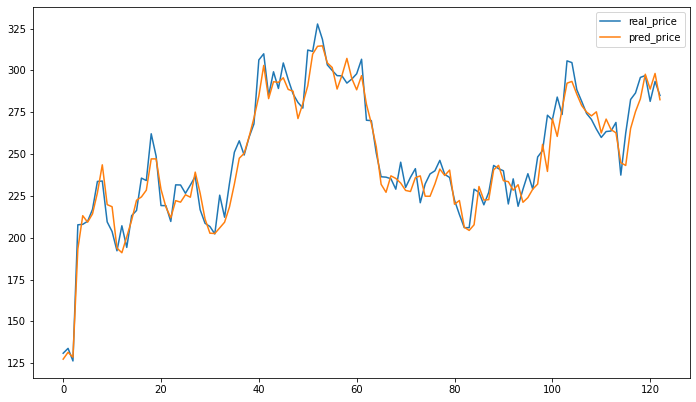

In [ ]:
pred = model.predict(x_test)

pred_price = []
for i in pred:
    pred_price.append((i+1)*window[0])
    
real_price = []
for i in y_test:
    real_price.append((i+1)*window[0])

fig = plt.figure(facecolor='white', figsize=(40, 15))
ax = fig.add_subplot(234)
ax.plot(real_price, label='real_price')
ax.plot(pred_price, label='pred_price')
ax.legend()
plt.show()

# **-----------------다음날 가격 예측-----------------**

In [ ]:
df['Open'] = df['Open'].astype('int')
df['High'] = df['High'].astype('int')
df['Low'] = df['Low'].astype('int')
df['Adj Close'] = df['Adj Close'].astype('int')
df['Volume'] = df['Volume'].astype('int')
df['Close'] = df['Close'].astype('int')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-24,196,196,195,195,195,2160500
1,2017-11-27,195,195,194,195,195,3210100
2,2017-11-28,195,199,194,199,199,6981100
3,2017-11-29,198,199,184,188,188,14202700
4,2017-11-30,190,190,186,187,187,6630100


In [ ]:
print(df.shape)
print("----")
edf=df.groupby('Date').mean()
print(edf.Close[-1])

(1258, 7)
----
286.0


In [ ]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [ ]:
dfx = df[['Date','Open','High','Low','Volume', 'Close']]
dfex=dfx.groupby('Date').mean()
dfex = MinMaxScaler(dfex)
print(dfex)
dfy = dfex[['Close']]
dfex = dfex[['Open','High','Low','Volume']]
print(dfy)

                Open      High       Low    Volume     Close
Date                                                        
2017-11-24  0.062382  0.045455  0.062977  0.007687  0.055238
2017-11-27  0.060491  0.043561  0.061069  0.015623  0.055238
2017-11-28  0.060491  0.051136  0.061069  0.044139  0.062857
2017-11-29  0.066163  0.051136  0.041985  0.098747  0.041905
2017-11-30  0.051040  0.034091  0.045802  0.041485  0.040000
...              ...       ...       ...       ...       ...
2022-11-16  0.275992  0.261364  0.269084  0.052136  0.266667
2022-11-17  0.247637  0.240530  0.246183  0.065744  0.245714
2022-11-18  0.253308  0.238636  0.238550  0.054809  0.230476
2022-11-21  0.241966  0.225379  0.229008  0.046222  0.226667
2022-11-22  0.228733  0.215909  0.219466  0.038574  0.228571

[1258 rows x 5 columns]
               Close
Date                
2017-11-24  0.055238
2017-11-27  0.055238
2017-11-28  0.062857
2017-11-29  0.041905
2017-11-30  0.040000
...              ...
2022-11-16  0.

In [ ]:
x = dfex.values.tolist()
y = dfy.values.tolist()

In [ ]:
window_size = 10

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.18147448011692355, 0.17803030299658518, 0.17938931294286464, 0.04945271412205511], [0.18147448011692355, 0.16666666663510102, 0.17557251905046328, 0.04629339060142839], [0.19281663512423128, 0.19507575753881143, 0.1870229007276674, 0.06445156094628464], [0.20982986763519285, 0.2234848484425218, 0.20801526713587495, 0.06369538011320022], [0.24007561432134678, 0.2632575757077164, 0.24045801522128665, 0.12729699380309797], [0.27599243851115457, 0.2651515151012971, 0.26717557246809626, 0.1019551055439397], [0.27599243851115457, 0.26136363631413567, 0.26908396941429696, 0.052135643717838645], [0.24763705099288527, 0.24053030298474806, 0.24618320605988872, 0.06574387399002592], [0.2533081284965391, 0.23863636359116738, 0.23854961827508597, 0.054808742962792076], [0.2419659734892314, 0.22537878783610252, 0.22900763354408252, 0.04622155342228537]] -> [0.22857142852789117]


In [ ]:
print('전체 데이터의 크기 :', len(data_x), len(data_y))

전체 데이터의 크기 : 1248 1248


In [ ]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print(train_x.shape, train_y.shape) #훈련데이터크기
print(test_x.shape, test_y.shape)  #테스트 데이터크기

(873, 10, 4) (873, 1)
(375, 10, 4) (375, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

#optimizer(최적화 함수):손실함수의 결과값을 최소화하는 함수
#loss(손실함수):예측한 값과 실제 정답의 차이를 비교하기 위한 함수

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_x, train_y, epochs=50, batch_size=10)
model.save(r'predict\netflix.h5')

Epoch 1/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 2/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 3/50
88/88 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 4/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 5/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 6/50
88/88 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 7/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 8/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 9/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 10/50
88/88 [==============================] - 1s 10ms/step - loss: 9.9660e-04
Epoch 11/50
88/88 [==============================] - 1s 10ms/step - loss: 9.5331e-04
Epoch 12/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 13/50
88/88 [============

In [ ]:
pred_y = model.predict(test_x)
#pred=print(*pred_y[-1])
#e=print(edf.Close[-1])
#d=print(dfy.Close[-1])
result= edf.Close[-1] * pred_y[-1] / dfy.Close[-1]
print("내일 주가 :"+str(result)+'USD')

12/12 [==============================] - 0s 4ms/step
내일 주가 :[297.4364]USD


#**-----------------version2(Fail)-----------------**

In [ ]:
training_set = df.iloc[:900, 1:2].values
test_set = df.iloc[900:, 1:2].values

In [ ]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 900):
   X_train.append(training_set_scaled[i-50:i, 0])
   y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(840, 50, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1, activation = 'linear'))

# Compiling the RNN
model.compile(optimizer = 'rmsprop', loss = 'mse')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 10)
model.summary()

Epoch 1/10
84/84 [==============================] - 16s 70ms/step - loss: 0.0273
Epoch 2/10
84/84 [==============================] - 6s 69ms/step - loss: 0.0133
Epoch 3/10
84/84 [==============================] - 6s 72ms/step - loss: 0.0112
Epoch 4/10
84/84 [==============================] - 6s 71ms/step - loss: 0.0104
Epoch 5/10
84/84 [==============================] - 6s 71ms/step - loss: 0.0091
Epoch 6/10
84/84 [==============================] - 6s 73ms/step - loss: 0.0078
Epoch 7/10
84/84 [==============================] - 6s 69ms/step - loss: 0.0074
Epoch 8/10
84/84 [==============================] - 6s 70ms/step - loss: 0.0060
Epoch 9/10
84/84 [==============================] - 6s 71ms/step - loss: 0.0064
Epoch 10/10
84/84 [==============================] - 6s 70ms/step - loss: 0.0058
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50) 

In [ ]:
model.save(r'\39_predict\samsung.h5')

In [ ]:
dataset_train = df.iloc[:900, 1:2]
dataset_test = df.iloc[900:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 418):
    X_test.append(training_set_scaled[i-50:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

print(X_test.shape)

(358, 50, 1)


In [ ]:
pred = model.predict(X_test)

pred_price = []
for i in pred:
    pred_price.append((i+1)*window[0])
    
real_price = []
for i in y_test:
    real_price.append((i+1)*window[0])

fig = plt.figure(facecolor='white', figsize=(70, 15))
ax = fig.add_subplot(234)
ax.plot(real_price, label='real_price')
ax.plot(pred_price, label='pred_price')
ax.legend()
plt.show()

12/12 [==============================] - 48s 30ms/step


NameError: ignored

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#predicted_stock_price.shape
print(dataset_test.shape)
print(predicted_stock_price.shape)

12/12 [==============================] - 0s 27ms/step
(358, 1)
(358, 1)


In [ ]:
dataset_test.values

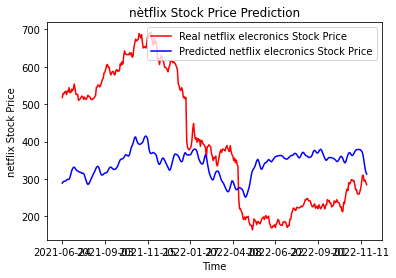

In [ ]:
plt.plot(df.loc[900:, 'Date'],dataset_test.values, color = 'red', label = 'Real netflix elecronics Stock Price')
plt.plot(df.loc[900:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted netflix elecronics Stock Price')
plt.xticks(np.arange(0,358,50))

plt.title('nètflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('netflix Stock Price')
plt.legend()
plt.show()